In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile


In [ ]:
# Setup paths for local execution
import os
import sys

# Project directories
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(BASE_DIR, 'data')
OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs')
SRC_DIR = os.path.join(BASE_DIR, 'src')

# Add src to path
sys.path.insert(0, SRC_DIR)


Mounted at /content/drive/


## Unziping file to desired location

In [ ]:
# zip_ref = zipfile.ZipFile("../../data/Data.zip", 'r')

In [ ]:
# zip_ref.extractall("../../data/")
# zip_ref.close()

## Reading file in to pandas data frame for EDA Analysis

In [3]:
original = pd.read_csv('../../data/Data.csv')

In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924446 entries, 0 to 924445
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      924446 non-null  object 
 1   StockCode    924446 non-null  object 
 2   Description  920261 non-null  object 
 3   Quantity     924446 non-null  int64  
 4   InvoiceDate  924446 non-null  object 
 5   Price        924446 non-null  float64
 6   Customer ID  716270 non-null  float64
 7   Country      924446 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.4+ MB


In [5]:
original.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


## count of each country stock

In [ ]:
original['id_var'] = original['Country'].astype(str)+'_'+original['StockCode'].astype(str)

# Total Stock

In [ ]:
original['id_var'].nunique()

27600

### just checking start week date, as from '2011-11-07, forecasting has to be made for next 4 week

In [ ]:
pd.to_datetime('2011/11/07').day_name()

'Monday'

In [ ]:
original['InvoiceDate'] = pd.to_datetime(original['InvoiceDate'])

In [ ]:
original['InvoiceDate'] = pd.to_datetime(original['InvoiceDate'].dt.date)

In [ ]:
original.describe()

,Quantity,Price,Customer ID
count,924446.000000,924446.000000,716270.000000
mean,10.218971,4.661329,15310.382113
std,140.712306,126.709079,1694.122317
min,-74215.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.100000,15227.000000
75%,11.000000,4.150000,16782.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
original['InvoiceDate'].max()

Timestamp('2011-12-10 00:00:00')

In [ ]:
originalm= original.loc[original['InvoiceDate'] < '11/7/2011',]  # excluding data after '11/7/2011'

In [ ]:
originalm['id_var'].nunique()/original['id_var'].nunique()

0.9865942028985507

# % of cases where Quantity is negative

In [ ]:
originalm.loc[originalm['Quantity'] < 0,].shape[0]/originalm.shape[0]

0.022576944479169317

# % of cases where price is negative

In [ ]:
originalm.loc[originalm['Price'] <= 0,].shape[0]/originalm.shape[0]

0.006249370803744976

In [ ]:
# !pip install category_encoders minepy eli5

In [ ]:
import missingno as msno

# To see if negative value having some relationship with other variable

In [ ]:
dat = originalm.copy()
dat.loc[originalm['Quantity'] < 0, 'Quantity'] = np.nan
dat.loc[originalm['Price'] < 0, 'Price'] = np.nan

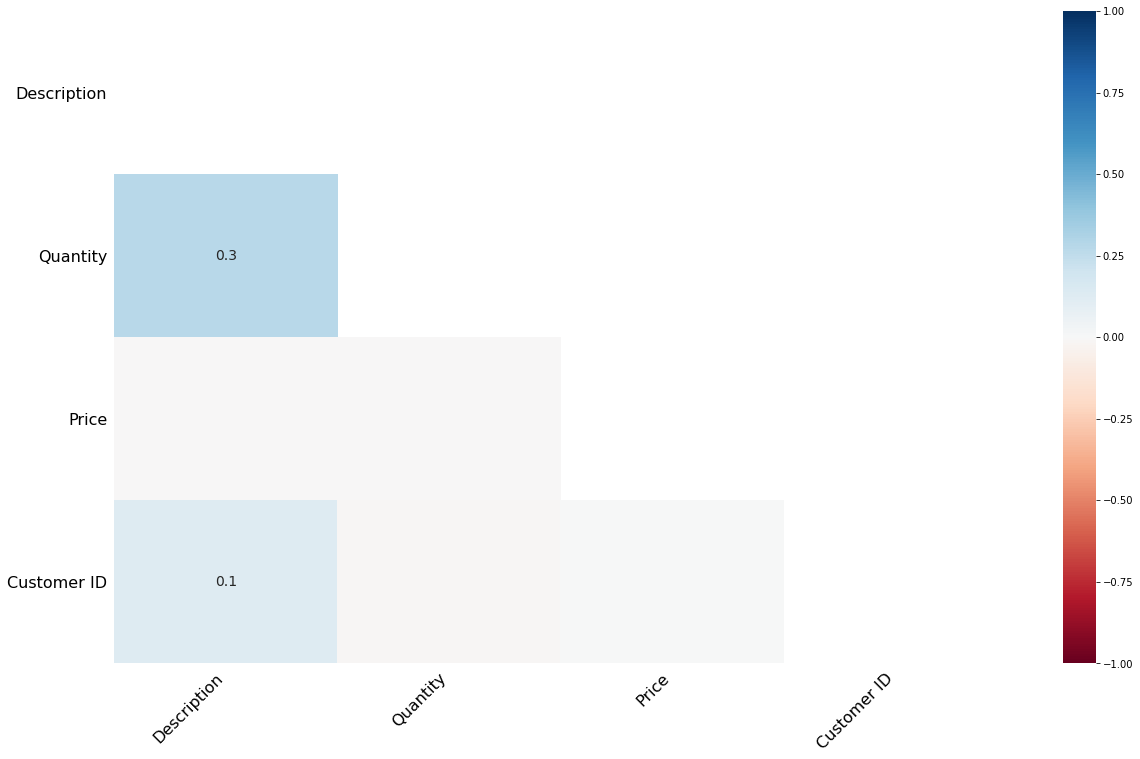

In [ ]:
msno.heatmap(dat)

In [ ]:
originalm.loc[originalm['Price'] < 0, ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
177338,A506401,B,Adjust bad debt,1,2010-04-29,-53594.36,NaN,United Kingdom,United Kingdom_B
273025,A516228,B,Adjust bad debt,1,2010-07-19,-44031.79,NaN,United Kingdom,United Kingdom_B
398731,A528059,B,Adjust bad debt,1,2010-10-20,-38925.87,NaN,United Kingdom,United Kingdom_B


# All StockCode B, Price is negative. excluding it from forecasting process as it seems not reated to stock

In [ ]:
originalm = originalm.loc[originalm['StockCode'] != 'B',]

In [ ]:
originalm.loc[originalm['Quantity'] < 0,].shape

(20408, 9)

# Trying to see if negative Quantity is associted with stock starting with 'C'

In [ ]:
dg = originalm.loc[originalm['Invoice'].isin(originalm.loc[originalm['Invoice'].str.startswith('C'),'Invoice'].unique().tolist()),]

In [ ]:
dg

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-01-12,2.95,16321.0,Australia,Australia_22087
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-01-12,1.65,16321.0,Australia,Australia_85206A
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-01-12,4.25,16321.0,Australia,Australia_21895
181,C489449,21896,POTTING SHED TWINE,-6,2009-01-12,2.10,16321.0,Australia,Australia_21896
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-01-12,2.95,16321.0,Australia,Australia_22083
...,...,...,...,...,...,...,...,...,...
921655,C573502,21913,VINTAGE SEASIDE JIGSAW PUZZLES,-2,2011-10-31,3.75,14808.0,United Kingdom,United Kingdom_21913
921799,C573541,23462,ROCOCO WALL MIRROR WHITE,-1,2011-10-31,19.95,14738.0,United Kingdom,United Kingdom_23462
922021,C573549,AMAZONFEE,AMAZON FEE,-1,2011-10-31,5942.57,NaN,United Kingdom,United Kingdom_AMAZONFEE
922022,C573550,AMAZONFEE,AMAZON FEE,-1,2011-10-31,2185.04,NaN,United Kingdom,United Kingdom_AMAZONFEE


In [ ]:
dg.loc[dg['Quantity'] < 0, ].shape[0]/originalm.loc[originalm['Quantity'] < 0,].shape[0]

0.8428067424539396

# So Approx 84.3 % of cases with negative Quantity is related to Invoice starting with 'C'. 

In [ ]:
originalm = originalm.sort_values(by=['id_var','InvoiceDate'])

In [ ]:
originalm.loc[originalm['Price'] == 0, 'Price'] = np.nan

In [ ]:
originalm['Price'] = originalm.groupby(['id_var'])['Price'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
originalm['Price'].isnull().sum()

404

In [ ]:
originalm['Price'] = original['Price'].fillna(np.mean(original['Price']))

In [ ]:
originalm = originalm.groupby(['id_var','InvoiceDate'])[['Quantity','Price']].agg({'Quantity':np.mean,'Price':np.mean}).reset_index()

In [ ]:
originalm['year'] = originalm['InvoiceDate'].dt.year

In [ ]:
originalm.isnull().sum()

id_var         0
InvoiceDate    0
Quantity       0
Price          0
year           0
dtype: int64

In [ ]:
originalm.loc[originalm['Price'].isnull(),]

,id_var,InvoiceDate,Quantity,Price,year


# total Stock

In [ ]:
originalm['id_var'].nunique()

27229

In [ ]:
oc = originalm.groupby(['id_var','year'])['Quantity'].sum().reset_index()

In [ ]:
exclude = oc.loc[((oc['year']==2011) & (oc['Quantity']==0)),'id_var']

In [ ]:
data = originalm.loc[~originalm['id_var'].isin(exclude.values),]

In [ ]:
stock_dist = data.groupby(['id_var'])['InvoiceDate'].count()

In [ ]:
stock_dist

id_var
Australia_10002       2
Australia_15036       1
Australia_15056BL     1
Australia_15058B      1
Australia_16161P      2
                     ..
West Indies_84508A    1
West Indies_84795B    1
West Indies_84827     1
West Indies_84944     1
West Indies_85040B    1
Name: InvoiceDate, Length: 27169, dtype: int64

In [ ]:
data['id_var'].nunique()

27169

In [ ]:
data.head()


,id_var,InvoiceDate,Quantity,Price,year
0,Australia_10002,2010-04-03,12.0,0.85,2010
1,Australia_10002,2010-10-26,24.0,0.85,2010
2,Australia_15036,2011-05-17,600.0,0.72,2011
3,Australia_15056BL,2011-05-23,3.0,5.95,2011
4,Australia_15058B,2010-11-23,2.0,7.95,2010


In [ ]:
data.shape

(531227, 5)

In [ ]:
datg = data.copy()

In [ ]:
datg.loc[datg['Quantity'] < 0,'Quantity'] = 0

In [ ]:
datg = datg.sort_values(by = ['id_var','InvoiceDate'])

In [ ]:
datg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531227 entries, 0 to 531688
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_var       531227 non-null  object        
 1   InvoiceDate  531227 non-null  datetime64[ns]
 2   Quantity     531227 non-null  float64       
 3   Price        531227 non-null  float64       
 4   year         531227 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.3+ MB


In [ ]:
country_stock = datg.groupby(['id_var'])['InvoiceDate'].count().reset_index()
country_stock = country_stock.sort_values(by=['InvoiceDate',],ascending=False)

In [ ]:
country_stock['InvoiceDate'].sum()

531227

# around 83 % of the stock have less than 14 data points

In [ ]:
country_stock.loc[country_stock['InvoiceDate'] <= 14,].shape[0]/country_stock.shape[0]

0.8317935882807611

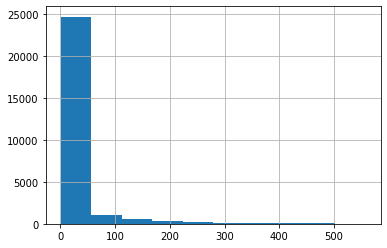

In [ ]:
country_stock['InvoiceDate'].hist()

# looking for contribution made by each stock to total global sales

In [ ]:
include_id = country_stock.loc[country_stock['InvoiceDate'] > 7,'id_var'].unique()

In [ ]:
len(include_id)

6099

In [ ]:
country_stock['id_var'].nunique()

27169

# around 22% of stock contributing 82 % of total volume

In [ ]:
len(include_id)/country_stock['id_var'].nunique()

0.2244837866686297

In [ ]:
stock_cont = datg.groupby(['id_var'])['Quantity'].sum().reset_index()

In [ ]:
stock_cont.loc[stock_cont['id_var'].isin(include_id),'Quantity'].sum() / stock_cont['Quantity'].sum()

0.8233703178819904

In [ ]:
datg = datg.loc[datg['id_var'].isin(include_id),]

In [ ]:
datg.shape

(490044, 5)

In [ ]:
datg['id_var'].nunique()

6099

# Pivoting to fill missing date. Actually to populate date for all stock until maximum date '2011-07-11

In [ ]:
data = pd.pivot_table(datg,columns=['id_var'],values=['Quantity'],index=['InvoiceDate'])

In [ ]:
data.head()

Quantity  ...                            
id_var      Australia_20685  ... United Kingdom_gift_0001_50
InvoiceDate                  ...                            
2009-01-12              NaN  ...                         NaN
2009-02-12              NaN  ...                         NaN
2009-03-12              NaN  ...                         NaN
2009-04-12              NaN  ...                         NaN
2009-05-12              NaN  ...                         NaN

[5 rows x 6099 columns]

In [ ]:
data.columns = [x for (y,x) in data.columns]

In [ ]:
dat = data.fillna(0)

In [ ]:
dat['InvoiceDate'] = dat.index

In [ ]:
dat = dat.reset_index(drop=True)

# melting data again

In [ ]:
dat = pd.melt(dat,id_vars=['InvoiceDate'])

In [ ]:
dat = dat.rename(columns={'variable':'id_var'})

In [ ]:
dat['id_var'].nunique()

6099

In [ ]:
start_stoc_date = datg.groupby(['id_var'])['InvoiceDate'].min().reset_index()

In [ ]:
start_stoc_date = start_stoc_date.rename(columns={'InvoiceDate':'start_date'})

In [ ]:
dat = dat.merge(start_stoc_date, on = ['id_var'],how='left')

# Since data is pivoted first before melting date of all stock is starting with 2009-01-12 filling lot of zero

In [ ]:
dat.head()

,InvoiceDate,id_var,value,start_date
0,2009-01-12,Australia_20685,0.0,2010-06-07
1,2009-02-12,Australia_20685,0.0,2010-06-07
2,2009-03-12,Australia_20685,0.0,2010-06-07
3,2009-04-12,Australia_20685,0.0,2010-06-07
4,2009-05-12,Australia_20685,0.0,2010-06-07


In [ ]:
dat = dat.loc[dat['start_date'] <= dat['InvoiceDate'],  ].sort_values(['id_var','InvoiceDate'])

In [ ]:
dat.drop(['start_date'],axis=1,inplace=True)

In [ ]:
dat.head()

,InvoiceDate,id_var,value
147,2010-06-07,Australia_20685,2.0
148,2010-06-08,Australia_20685,0.0
149,2010-06-09,Australia_20685,0.0
150,2010-06-10,Australia_20685,0.0
151,2010-06-12,Australia_20685,0.0


In [ ]:
original.loc[original['InvoiceDate']== '2010-06-11',]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,id_var


# it seems for some date data is not there for entire row, So filling missing date again

In [ ]:
datgc = dat.copy()

In [ ]:
datgc = (datgc.set_index('InvoiceDate')
   .groupby(['id_var']).apply(lambda x: x.drop(['id_var'],axis=1).asfreq('D'))
   .reset_index()
)

In [ ]:
datgc = datgc.fillna(0)

In [ ]:
datgc['timeelapsed'] = datgc.groupby(['id_var'])[['InvoiceDate']].shift(1)

In [ ]:
datgc.head()

,id_var,InvoiceDate,value,timeelapsed
0,Australia_20685,2010-06-07,2.0,NaT
1,Australia_20685,2010-06-08,0.0,2010-06-07
2,Australia_20685,2010-06-09,0.0,2010-06-08
3,Australia_20685,2010-06-10,0.0,2010-06-09
4,Australia_20685,2010-06-11,0.0,2010-06-10


In [ ]:
# datgc['timeelapsed']

In [ ]:
datgc['timeelapsed'] = (datgc['InvoiceDate'].sub(datgc['timeelapsed'],axis=0).dt.days).fillna(1)

In [ ]:
datgc['timeelapsed'] = datgc['timeelapsed'].fillna(0)

In [ ]:
datgc.head()

,id_var,InvoiceDate,value,timeelapsed
0,Australia_20685,2010-06-07,2.0,1.0
1,Australia_20685,2010-06-08,0.0,1.0
2,Australia_20685,2010-06-09,0.0,1.0
3,Australia_20685,2010-06-10,0.0,1.0
4,Australia_20685,2010-06-11,0.0,1.0


In [ ]:
datgc = datgc.rename(columns={'value':'Quantity'})

In [ ]:
datgc['cumsum'] = datgc.groupby(['id_var'])['Quantity'].cumsum()

In [ ]:
datgc['cumdist'] = datgc.groupby(['id_var','cumsum'])['timeelapsed'].cumsum()-1

In [ ]:
datgc.head()

,id_var,InvoiceDate,Quantity,timeelapsed,cumsum,cumdist
0,Australia_20685,2010-06-07,2.0,1.0,2.0,0.0
1,Australia_20685,2010-06-08,0.0,1.0,2.0,1.0
2,Australia_20685,2010-06-09,0.0,1.0,2.0,2.0
3,Australia_20685,2010-06-10,0.0,1.0,2.0,3.0
4,Australia_20685,2010-06-11,0.0,1.0,2.0,4.0


In [ ]:
value_after_zero = datgc.groupby('id_var')['cumdist'].mean().reset_index()

In [ ]:
value_after_zero.sort_values(by = ['cumdist'],ascending=False)

,id_var,cumdist
6093,United Kingdom_S,308.161189
2473,United Kingdom_21300,275.108382
2471,United Kingdom_21298,272.143064
4499,United Kingdom_35840,264.308102
2179,United Kingdom_20879,263.918977
...,...,...
3375,United Kingdom_22411,0.601783
3349,United Kingdom_22379,0.573551
3354,United Kingdom_22384,0.542348
3352,United Kingdom_22382,0.503715


In [ ]:
value_after_zero.loc[value_after_zero['cumdist'] < 90,'id_var'].nunique()

5432

In [ ]:

value_after_zero.loc[value_after_zero['cumdist'] < 90,'id_var'].nunique()/stock_cont['id_var'].nunique()

0.19993374802164232

In [ ]:
stock_cont.loc[stock_cont['id_var'].isin(value_after_zero.loc[value_after_zero['cumdist'] < 90,'id_var'].unique()),'Quantity'].sum() / stock_cont['Quantity'].sum()

0.8013995007384286

# Excluding all those stock which has no demand from last 90 days, leaves us 5432 stock (20 % of stock)

In [ ]:
datgc.drop(['timeelapsed'],axis=1,inplace=True)

In [ ]:
datgc = datgc.loc[datgc['id_var'].isin(value_after_zero.loc[value_after_zero['cumdist'] < 90,'id_var'].unique()),]

In [ ]:
datgc['id_var'].nunique()

5432

In [ ]:
datgc.shape

(4018234, 5)

In [ ]:
datgc.head()

,id_var,InvoiceDate,Quantity,cumsum,cumdist
0,Australia_20685,2010-06-07,2.0,2.0,0.0
1,Australia_20685,2010-06-08,0.0,2.0,1.0
2,Australia_20685,2010-06-09,0.0,2.0,2.0
3,Australia_20685,2010-06-10,0.0,2.0,3.0
4,Australia_20685,2010-06-11,0.0,2.0,4.0


In [ ]:
country_stock = datgc['id_var'].str.split("_", n = 1, expand = True)

## Adding Some date related feature

In [ ]:
######### Feature Creation

In [ ]:
datgc['month'] = datgc['InvoiceDate'].dt.month
datgc['dow'] = datgc['InvoiceDate'].dt.dayofweek
datgc['qtr'] = datgc['InvoiceDate'].dt.quarter
datgc['year'] = datgc['InvoiceDate'].dt.year
datgc['dom'] = datgc['InvoiceDate'].dt.day
datgc['doy'] = datgc['InvoiceDate'].dt.dayofyear

In [ ]:
def weekinmonth(x):
    fdom = x.dt.day // 7
    return fdom

In [ ]:
datgc['fdom'] = weekinmonth(datgc['InvoiceDate'])

In [ ]:
datgc['Country'] = country_stock[0]
datgc['StockCode'] = country_stock[1]

In [ ]:
datgc.head()

,id_var,InvoiceDate,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,Country,StockCode
0,Australia_20685,2010-06-07,2.0,2.0,0.0,6,0,2,2010,7,158,1,Australia,20685
1,Australia_20685,2010-06-08,0.0,2.0,1.0,6,1,2,2010,8,159,1,Australia,20685
2,Australia_20685,2010-06-09,0.0,2.0,2.0,6,2,2,2010,9,160,1,Australia,20685
3,Australia_20685,2010-06-10,0.0,2.0,3.0,6,3,2,2010,10,161,1,Australia,20685
4,Australia_20685,2010-06-11,0.0,2.0,4.0,6,4,2,2010,11,162,1,Australia,20685


In [ ]:
## holiday feature

In [ ]:
import holidays

In [ ]:
countrylistLoop = datgc['Country'].unique()

In [ ]:
len(countrylistLoop)

20

In [ ]:
country = {}
for count in countrylistLoop:
  try:
    dat = []
    for date, name in sorted(holidays.CountryHoliday(count, years=np.arange(2008,2012,1)).items()):
      dat.append(date)
    country[count]=pd.to_datetime(dat)
  except:
    pass
    

In [ ]:
len(country)

16

In [ ]:
datgc['holiday'] = -1

In [ ]:
for key in country.keys():
  if key in countrylistLoop:
    datgc.loc[datgc['Country']==key,'holiday'] = np.where(datgc.loc[datgc['Country']==key,'InvoiceDate'].isin(country[key]),1,0)  

In [ ]:
datgc.head()

,id_var,InvoiceDate,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,Country,StockCode,holiday
0,Australia_20685,2010-06-07,2.0,2.0,0.0,6,0,2,2010,7,158,1,Australia,20685,0
1,Australia_20685,2010-06-08,0.0,2.0,1.0,6,1,2,2010,8,159,1,Australia,20685,0
2,Australia_20685,2010-06-09,0.0,2.0,2.0,6,2,2,2010,9,160,1,Australia,20685,0
3,Australia_20685,2010-06-10,0.0,2.0,3.0,6,3,2,2010,10,161,1,Australia,20685,0
4,Australia_20685,2010-06-11,0.0,2.0,4.0,6,4,2,2010,11,162,1,Australia,20685,0


In [ ]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/drive/My Drive/ML_AI/DeepFuture/')

In [ ]:
import FourierComponent as FC

In [ ]:
datgc.head()

,id_var,InvoiceDate,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,Country,StockCode,holiday
0,Australia_20685,2010-06-07,2.0,2.0,0.0,6,0,2,2010,7,158,1,Australia,20685,0
1,Australia_20685,2010-06-08,0.0,2.0,1.0,6,1,2,2010,8,159,1,Australia,20685,0
2,Australia_20685,2010-06-09,0.0,2.0,2.0,6,2,2,2010,9,160,1,Australia,20685,0
3,Australia_20685,2010-06-10,0.0,2.0,3.0,6,3,2,2010,10,161,1,Australia,20685,0
4,Australia_20685,2010-06-11,0.0,2.0,4.0,6,4,2,2010,11,162,1,Australia,20685,0


In [ ]:
datgc.merge(originalm[['id_var','InvoiceDate','Price']], on = ['id_var','InvoiceDate'], how='left')

,id_var,InvoiceDate,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,Country,StockCode,holiday,Price
0,Australia_20685,2010-06-07,2.0,2.0,0.0,6,0,2,2010,7,158,1,Australia,20685,0,7.49
1,Australia_20685,2010-06-08,0.0,2.0,1.0,6,1,2,2010,8,159,1,Australia,20685,0,NaN
2,Australia_20685,2010-06-09,0.0,2.0,2.0,6,2,2,2010,9,160,1,Australia,20685,0,NaN
3,Australia_20685,2010-06-10,0.0,2.0,3.0,6,3,2,2010,10,161,1,Australia,20685,0,NaN
4,Australia_20685,2010-06-11,0.0,2.0,4.0,6,4,2,2010,11,162,1,Australia,20685,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018229,United Kingdom_gift_0001_50,2011-11-01,0.0,19.0,124.0,11,1,4,2011,1,305,0,United Kingdom,gift_0001_50,-1,NaN
4018230,United Kingdom_gift_0001_50,2011-11-02,0.0,19.0,125.0,11,2,4,2011,2,306,0,United Kingdom,gift_0001_50,-1,NaN
4018231,United Kingdom_gift_0001_50,2011-11-03,0.0,19.0,126.0,11,3,4,2011,3,307,0,United Kingdom,gift_0001_50,-1,NaN
4018232,United Kingdom_gift_0001_50,2011-11-04,0.0,19.0,127.0,11,4,4,2011,4,308,0,United Kingdom,gift_0001_50,-1,NaN


In [ ]:
datgc['ds'] = datgc['InvoiceDate']


In [ ]:
datgc.drop(['InvoiceDate','Country','StockCode'],axis=1,inplace=True)


In [ ]:
datgc.head()

,id_var,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,holiday,ds
0,Australia_20685,2.0,2.0,0.0,6,0,2,2010,7,158,1,0,2010-06-07
1,Australia_20685,0.0,2.0,1.0,6,1,2,2010,8,159,1,0,2010-06-08
2,Australia_20685,0.0,2.0,2.0,6,2,2,2010,9,160,1,0,2010-06-09
3,Australia_20685,0.0,2.0,3.0,6,3,2,2010,10,161,1,0,2010-06-10
4,Australia_20685,0.0,2.0,4.0,6,4,2,2010,11,162,1,0,2010-06-11


In [ ]:
import gc
gc.collect()

51

In [ ]:
datgc.to_csv('../../data/cleaned_data.csv')

In [ ]:
import missingno as msno

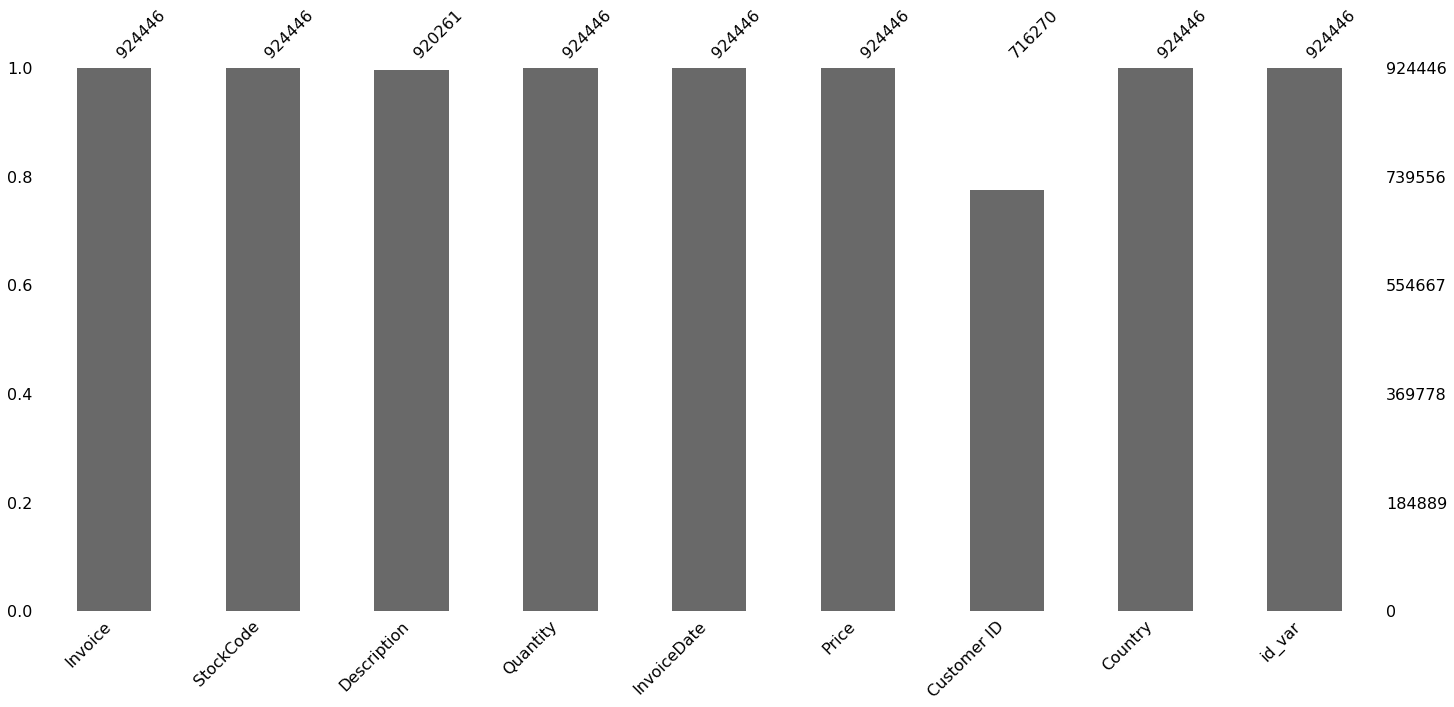

In [ ]:
msno.bar(original)